In [252]:
import pandas as pd    
import numpy as np      
import matplotlib.pyplot as plt
import math

In [261]:
data = pd.DataFrame({'samsung1':[1,1,1,2,3,4],'lg1':[1,5,6,6,7,7], 'sk1': [1,2,8,12,10,11], 'ls1': [1,13,18,16,20,15],
                     'samsung2':[1,1,1,2,3,4],'lg2':[1,5,6,6,7,17], 'sk2': [1,2,8,12,13,11], 'ls2': [1,13,18,8,12,10],
                     'samsung3':[1,1,1,2,3,4],'lg3':[1,5,6,16,7,7], 'sk3': [1,2,8,12,16,11], 'ls3': [1,13,18,12,10,20],
                     'samsung4':[1,1,1,2,3,4],'lg4':[1,5,6,6,17,7], 'sk4': [1,2,8,12,10,11], 'ls4': [1,13,18,11,20,23],
                     'samsung5':[1,1,1,2,3,4],'lg5':[1,5,6,6,7,20], 'sk5': [1,2,8,12,12,11], 'ls5': [1,18,12,10,20,25],
                     'samsung6':[1,1,1,2,3,4],'lg6':[1,5,3,6,7,7], 'sk6': [1,2,8,12,17,11], 'ls6': [1,13,1,6,20,18],
                     'samsung7':[1,1,1,2,3,4],'lg7':[1,5,6,6,7,8], 'sk7': [1,2,8,12,18,11], 'ls7': [1,1,8,16,20,15],
                     'samsung8':[1,1,1,2,3,4],'lg8':[1,5,3,6,7,7]}) 


In [212]:
rets = np.log(data / data.shift(1))     # 로그수익률로 표시
rets = rets.drop(0)
rets

,samsung1,lg1,sk1,ls1,samsung2,lg2,sk2,ls2,samsung3,lg3,...,samsung6,lg6,sk6,ls6,samsung7,lg7,sk7,ls7,samsung8,lg8
1,0.000000,1.609438,0.693147,2.564949,0.000000,1.609438,0.693147,2.564949,0.000000,1.609438,...,0.000000,1.609438,0.693147,2.564949,0.000000,1.609438,0.693147,0.000000,0.000000,1.609438
2,0.000000,0.182322,1.386294,0.325422,0.000000,0.182322,1.386294,0.325422,0.000000,0.182322,...,0.000000,-0.510826,1.386294,-2.564949,0.000000,0.182322,1.386294,2.079442,0.000000,-0.510826
3,0.693147,0.000000,0.405465,-0.117783,0.693147,0.000000,0.405465,-0.810930,0.693147,0.980829,...,0.693147,0.693147,0.405465,1.791759,0.693147,0.000000,0.405465,0.693147,0.693147,0.693147
4,0.405465,0.154151,-0.182322,0.223144,0.405465,0.154151,0.080043,0.405465,0.405465,-0.826679,...,0.405465,0.154151,0.348307,1.203973,0.405465,0.154151,0.405465,0.223144,0.405465,0.154151
5,0.287682,0.000000,0.095310,-0.287682,0.287682,0.887303,-0.167054,-0.182322,0.287682,0.000000,...,0.287682,0.000000,-0.435318,-0.105361,0.287682,0.133531,-0.492476,-0.287682,0.287682,0.000000


In [213]:
top10 = rets.mean().sort_values(ascending = False).head(10)
rets = rets[top10.index]

In [231]:
weights = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])     # 자산비중 행렬
# weights = np.array([0,0.15,0,0,0,0.35,0,0.5,0,0]) 

In [232]:
crets = np.sum(rets.mean()*weights)*10


In [233]:
covmat = rets.cov()*10


In [236]:
variance = weights.T @ covmat @ weights   

In [218]:
prets = []     # 리스트 형태로 수익을 쌓을 장소
pvols = []     # 리스트 형태로 위험(표준편차)을 쌓을 장소

In [219]:
for p in range (1000):     # 1000회 반복
    weights = np.random.random(10)   # 랜덤한 10개의 숫자를 생성
    weights /= np.sum(weights)     # 10개의 숫자의 합계가 1이 되도록 조정
    prets.append(np.sum(rets.mean() * weights) * 10)    # 계산된 포트폴리오 수익을 prets에 저장
    covmat = rets.cov() * 10    # cov matrix 만들기
    pvols.append(np.sqrt(weights.T @ covmat @ weights)) # 계산된 포트폴리오 위험을 pvols에 저장

In [220]:
prets = np.array(prets)
pvols = np.array(pvols)

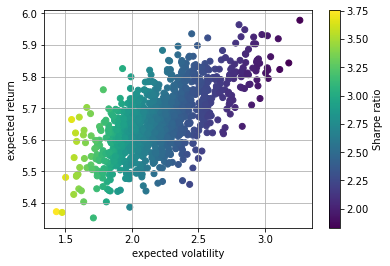

In [221]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

In [222]:
import scipy.optimize as sco

In [223]:
def minvar(weights):
    return np.sqrt(weights.T @ covmat @ weights)

In [224]:
w = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})                     # 합계가 1이 되도록
bnds = ((0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1))

opt = sco.minimize(minvar, w, method='SLSQP', bounds=bnds, constraints=cons)

In [225]:
orets = np.sum(rets.mean() * opt['x']) * 10
ovol = np.sqrt(opt['x'].T @ covmat @ opt['x'])

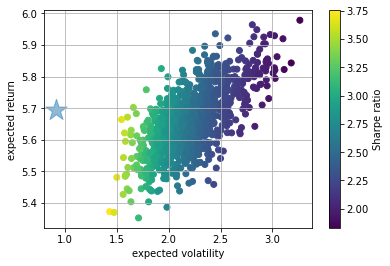

In [226]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

plt.scatter(ovol, orets, marker="*", s=500, alpha=0.5)
plt.show()

In [227]:
buy = opt['x']>0.05

In [243]:
pf1 = pd.DataFrame({'stock' : top10.index[buy], 'ratio': np.round(opt['x'][buy],1)})

In [244]:
pf1

,stock,ratio
0,lg5,0.4
1,ls6,0.1
2,ls7,0.5


In [ ]:
weights = np.array([0,0.15,0,0,0,0.35,0,0.5,0,0])
crets = np.sum(rets.mean()*weights)*10
covmat = rets.cov()*10
variance = weights.T @ covmat @ weights   

In [238]:
crets

5.631947806720307

In [251]:
variance

2.0386717973846826

In [284]:
pf1.iloc[1,1]

0.1

In [269]:
stock_data = pd.DataFrame({'samsung1':[1,1,1,2,3,4],'lg1':[1,5,6,6,7,7], 'sk1': [1,2,8,12,10,11], 'ls1': [1,13,18,16,20,15],
                     'samsung2':[1,1,1,2,3,4],'lg2':[1,5,6,6,7,17], 'sk2': [1,2,8,12,13,11], 'ls2': [1,13,18,8,12,10],
                     'samsung3':[1,1,1,2,3,4],'lg3':[1,5,6,16,7,7], 'sk3': [1,2,8,12,16,11], 'ls3': [1,13,18,12,10,20],
                     'samsung4':[1,1,1,2,3,4],'lg4':[1,5,6,6,17,7], 'sk4': [1,2,8,12,10,11], 'ls4': [1,13,18,11,20,23],
                     'samsung5':[1,1,1,2,3,4],'lg5':[1,5,6,6,7,20], 'sk5': [1,2,8,12,12,11], 'ls5': [1,18,12,10,20,25],
                     'samsung6':[1,1,1,2,3,4],'lg6':[1,5,3,6,7,7], 'sk6': [1,2,8,12,17,11], 'ls6': [1,13,1,6,20,18],
                     'samsung7':[1,1,1,2,3,4],'lg7':[1,5,6,6,7,8], 'sk7': [1,2,8,12,18,11], 'ls7': [1,1,8,16,20,15],
                     'samsung8':[1,1,1,2,3,4],'lg8':[1,5,3,6,7,73500]}) 

In [273]:
total_asset = 100000000

In [286]:
custom_pf = pd.DataFrame(columns=['stock_name', 'num_of_shares', 'amount', 'ratio'])

for i in range(0,len(pf1)):
    stock_name = pf1.iloc[i,0]
    
    conn = sqlite3.connect('./' + stock_name + '.db')
    c = conn.cursor()
    stock_data = pd.read_sql('SELECT * FROM ' + stock_name, con=conn)
    c.close()

    stock_price = stock_data.iloc[-1,-1]
    stock_buy = total_asset * pf1.iloc[i,1]
    num_of_shares = int(stock_buy/stock_price)
    amount = num_of_shares*stock_price
    
    custom_pf = custom_pf.append({'stock_name' : stock_name , 'num_of_shares' : num_of_shares, 'amount' : amount, 'ratio' : pf1.iloc[i,1]} , ignore_index=True)

print(custom_pf)
    
    

  stock_name num_of_shares    amount  ratio
0        lg5           544  39984000    0.4
1        ls6           136   9996000    0.1
2        ls7           680  49980000    0.5
